<a href="https://colab.research.google.com/github/Michael-faried/CodeAlpha_Breast-Cancer-Prediction/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Breast Cancer Prediction**
*This project involves using a dataset to assess the probability ofa breast tumor being malignant or benign. It considers factorssuch as lump thickness, bare nuclei count, and mitosis. It's avaluable opportunity for aspiring machine learning practitionersto gain experience in R programming while working on a real-world problem.*

In [144]:
df <- read.csv("Breast Cancer Prediction.csv")
head(df)

,Sample.code.number,Clump.Thickness,Uniformity.of.Cell.Size,Uniformity.of.Cell.Shape,Marginal.Adhesion,Single.Epithelial.Cell.Size,Bare.Nuclei,Bland.Chromatin,Normal.Nucleoli,Mitoses,Class
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2
5,1017023,4,1,1,3,2,1,3,1,1,2
6,1017122,8,10,10,8,7,10,9,7,1,4


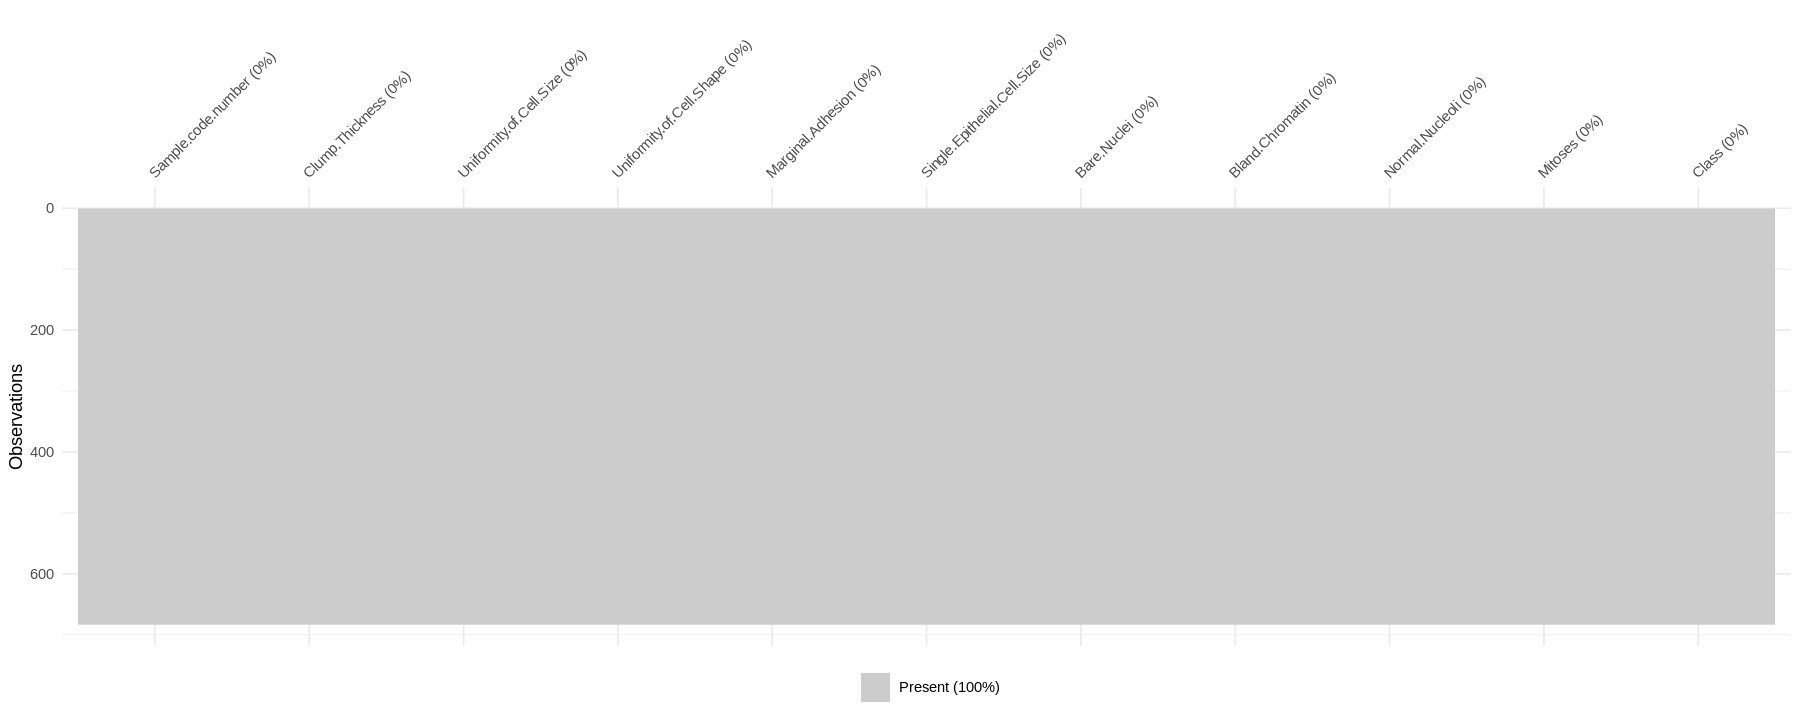

In [145]:
# Install the naniar package if not already installed
# install.packages("naniar")

# Load the naniar package
library(naniar)
# using vis_miss function to visually identify missing values
vis_miss(df)

## **Data Preprocessing**

In [146]:
# replacing the values with 0 and 1 for the purpose of building logistic regression model
unique(df$Class)
df$Class <- ifelse(df$Class == 2, 0, 1)

[1] 2 4

 This is important information. These two values refer to ‘malignant’ = 4 or ‘benign’ = 2.
 However, for the purpose of building logistic regression model I replaced these values with 0 for benign and 1 for malignant.
 Now I’m going to check if there are any missing values in this dataset.

In [147]:
# checking if any columns have missing values
print("Checking For NULL Values...")
colSums(is.na(df))

[1] "Checking For NULL Values..."


Sample.code.number             Clump.Thickness 
                          0                           0 
    Uniformity.of.Cell.Size    Uniformity.of.Cell.Shape 
                          0                           0 
          Marginal.Adhesion Single.Epithelial.Cell.Size 
                          0                           0 
                Bare.Nuclei             Bland.Chromatin 
                          0                           0 
            Normal.Nucleoli                     Mitoses 
                          0                           0 
                      Class 
                          0

## **Exploratory Data Analysis**


**The purpose of EDA is:**

to use summary statistics and visualizations to better understand data,
*find clues about the tendencies of the data, its quality and to formulate assumptions and the hypothesis of our analysis

For data preprocessing to be successful, it is essential to have an overall picture of your data
Basic statistical descriptions can be used to identify properties of the data and highlight which data values should be treated as noise or outliers.

Next step is to explore the data. There are two approached used to examine the data using:

**Descriptive statistics** is the process of condensing key characteristics of the data set into simple numeric metrics. Some of the common metrics used are mean, standard deviation, and correlation.

**Visualization** is the process of projecting the data, or parts of it, into Cartesian space or into abstract images. In the data mining process, data exploration is leveraged in many different steps including preprocessing, modeling, and interpretation of results.

In [148]:
# Install the skimr package
install.packages("skimr")

# Load the skimr package
library(skimr)

# Read your data
df <- read.csv("Breast Cancer Prediction.csv")

# Summarize the data using skim()
skimmed_data <- skim(df)
print(skimmed_data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘skimr’


The following object is masked from ‘package:naniar’:

    n_complete




── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             683   
Number of columns          11    
_______________________          
Column type frequency:           
  numeric                  11    
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable               n_missing complete_rate       mean         sd
 1 Sample.code.number                  0             1 1076720.   620644.   
 2 Clump.Thickness                     0             1       4.44      2.82 
 3 Uniformity.of.Cell.Size             0             1       3.15      3.07 
 4 Uniformity.of.Cell.Shape            0             1       3.22      2.99 
 5 Marginal.Adhesion                   0             1       2.83      2.86 
 6 Single.Epithelial.Cell.Size         0             1       3.23      2.22 
 7 Bare.Nuclei                  

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



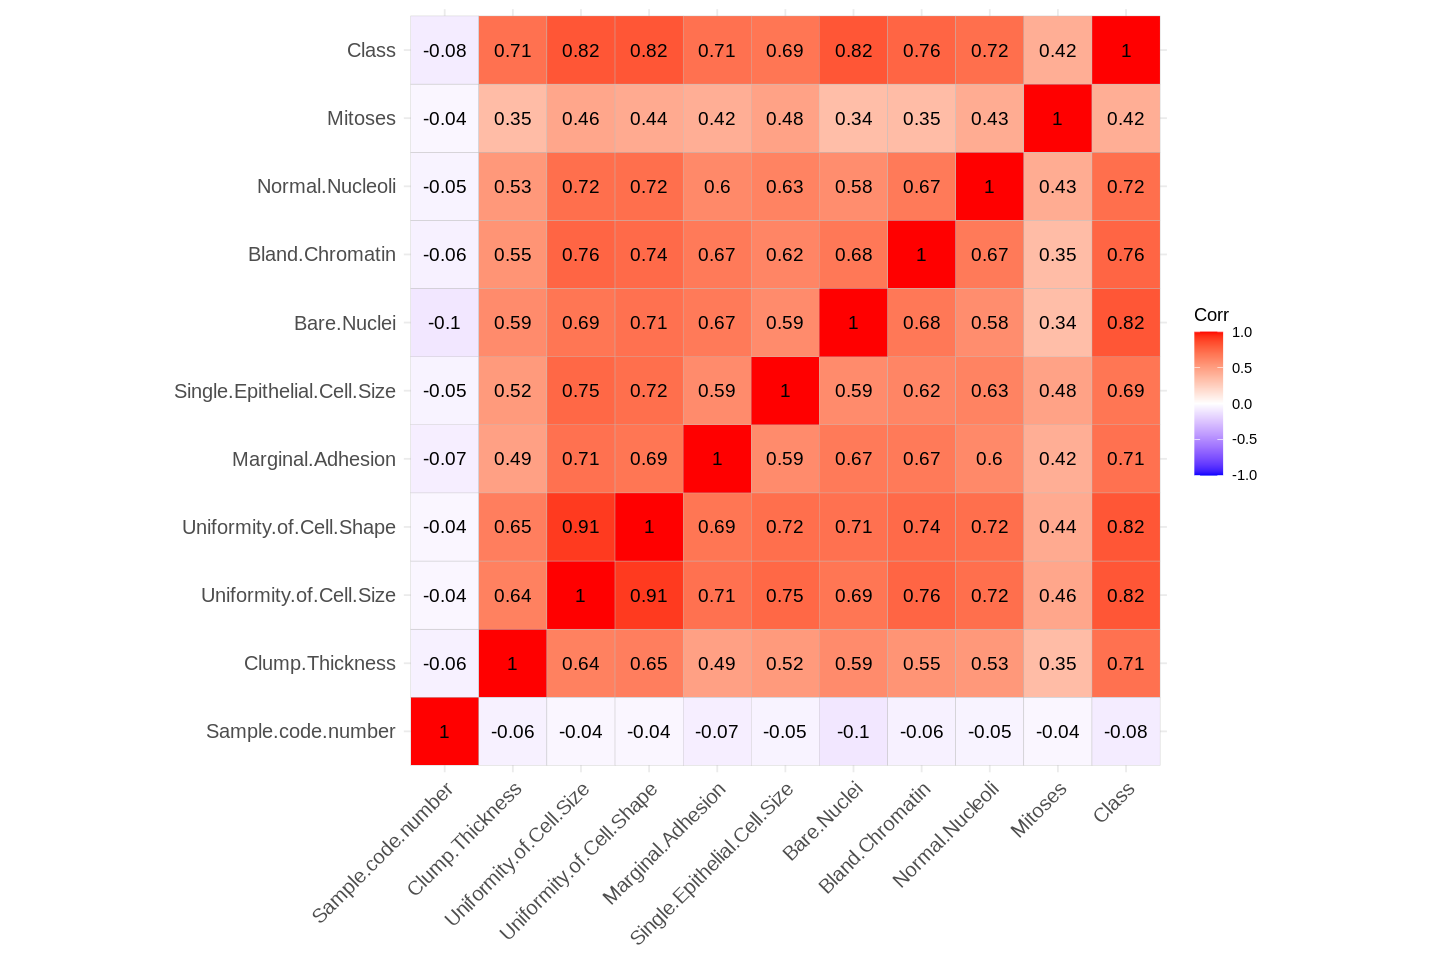

In [149]:
# Install the ggcorrplot package
install.packages("ggcorrplot")

# Load the ggcorrplot package
library(ggcorrplot)
library(repr)  # Load the repr library

# Read your data
df <- read.csv("Breast Cancer Prediction.csv")

# Calculate the correlation matrix
correlation <- cor(df[, 1:11])

# Set the figure size to adjust the width and height
options(repr.plot.width=12, repr.plot.height=8)  # Adjust width and height as needed

# Create the ggcorrplot
ggcorrplot(correlation, lab = TRUE)

**Description:**

The chart is a correlation plot that visualizes the pairwise correlations between the numerical attributes in the dataset. Each square in the plot represents the correlation between two variables. The color and shade of each square indicate the strength and direction of the correlation.

**Positive Correlation:** Squares with a lighter shade of blue represent positive correlations, indicating that as one variable increases, the other tends to increase as well.

**Negative Correlation:** Squares with a lighter shade of red represent negative correlations, indicating that as one variable increases, the other tends to decrease.

**No Correlation:** Squares with a neutral color (usually close to white) represent little to no correlation between the variables.

The labels on the diagonal line show the names of the variables being compared. This chart is a useful tool for identifying potential relationships between variables in the dataset, helping you understand how changes in one variable might affect another. It can be valuable for exploratory data analysis (EDA) and feature selection in machine learning tasks.

In your specific context, it can help in understanding how the various attributes are correlated with each other, which can be important for identifying which features might be more relevant when predicting breast cancer outcomes.

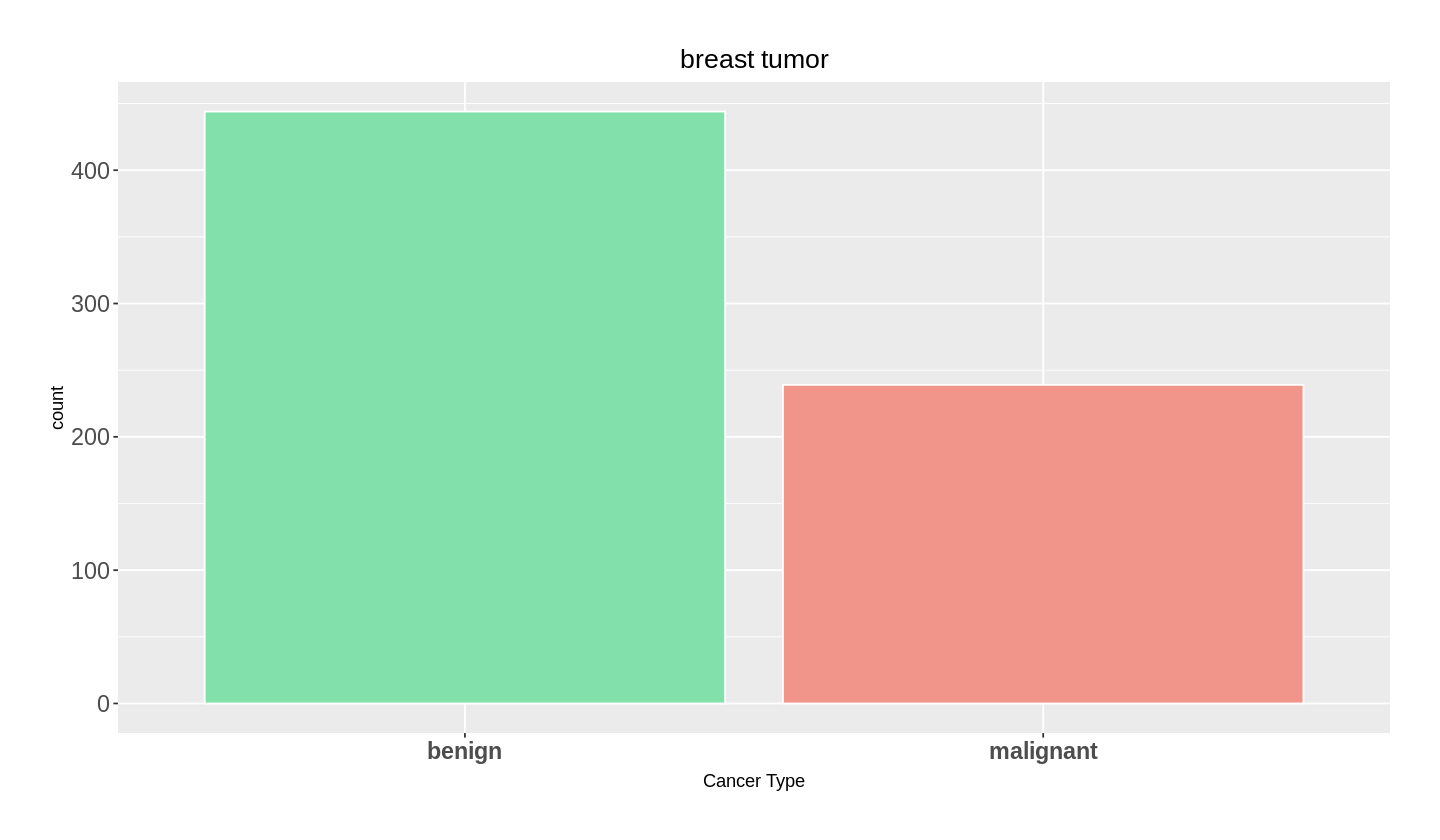

In [150]:
library(repr)  # Load the repr library
options(repr.plot.width=12, repr.plot.height=7)  # Adjust width and height as needed

library(ggplot2)

# Define custom colors
custom_colors <- c("#82E0AA", "#F1948A")  # You can change these colors

# Set a custom theme for the plot
custom_theme <- theme_minimal() +
  theme(
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 14),
    plot.title = element_text(size = 16),
    panel.grid.major = element_line(size = 0.2, color = "gray80"),
    panel.grid.minor = element_blank(),
    panel.background = element_blank()
  )

# Map the "Class" variable to a factor with custom labels
df$Class <- factor(df$Class, labels = c("benign", "malignant"))

# Plot bar chart for the 'Class' variable with custom style and x-axis title
ggplot(df, aes(x = Class)) +
  geom_bar(fill = custom_colors, color = "white") +
  labs(title = "Class", x = "Cancer Type") +
  scale_x_discrete(labels = c("benign" = expression(bold("benign")), "malignant" = expression(bold("malignant")))) +
  theme(plot.title = element_text(hjust = 0.5, size = 16),
        plot.margin = margin(t = 30, r = 30, b = 30, l = 30),
        axis.text.x = element_text(size = 14),  # Adjust x-axis label size
        axis.text.y = element_text(size = 14))  +

  ggtitle("breast tumor")


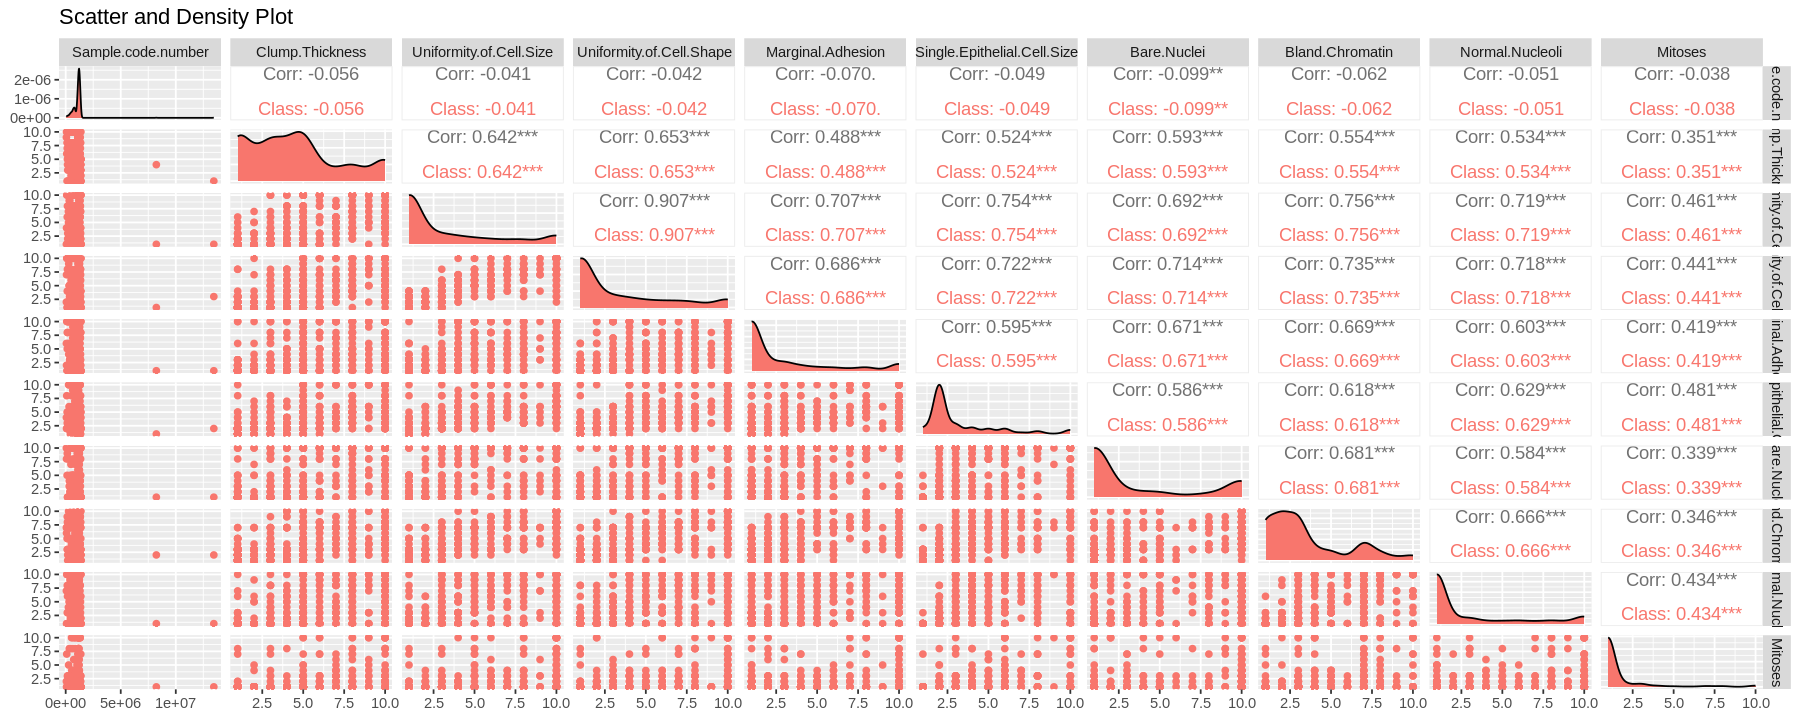

In [151]:
# Load the GGally package
# install.packages("GGally")
library(GGally)
library(repr)  # Load the repr library
options(repr.plot.width=15, repr.plot.height=6)  # Adjust width and height as needed

# Select and keep only numerical columns
numeric_cols <- df[, sapply(df, is.numeric)]

# Create a scatter and density plot matrix
ggpairs(numeric_cols, title = "Scatter and Density Plot",  mapping = aes(color = 'Class') )


This chart is a matrix of scatterplots and density plots. It is designed to help you explore the relationships between various numerical attributes in your dataset. Each cell of the matrix represents a unique combination of two numerical variables.

**Scatterplots**:

The lower triangle of the matrix consists of scatterplots, which display the relationship between two numerical variables. Each point in the scatterplot represents a data point from your dataset.
The x-axis and y-axis of each scatterplot represent different numerical attributes.
The scatterplots are color-coded to distinguish data points belonging to different classes or groups, as indicated by the 'Class' column.

**Density Plots:**

The upper triangle of the matrix displays density plots, showing the distribution of data for each numerical variable.
These density plots provide insights into the distribution and spread of each numerical attribute.
Overall, this matrix enables you to quickly identify correlations, patterns, and clusters in your data, making it a valuable tool for data exploration and analysis. It's particularly useful for identifying potential relationships between variables and understanding the distribution of data within each variable.

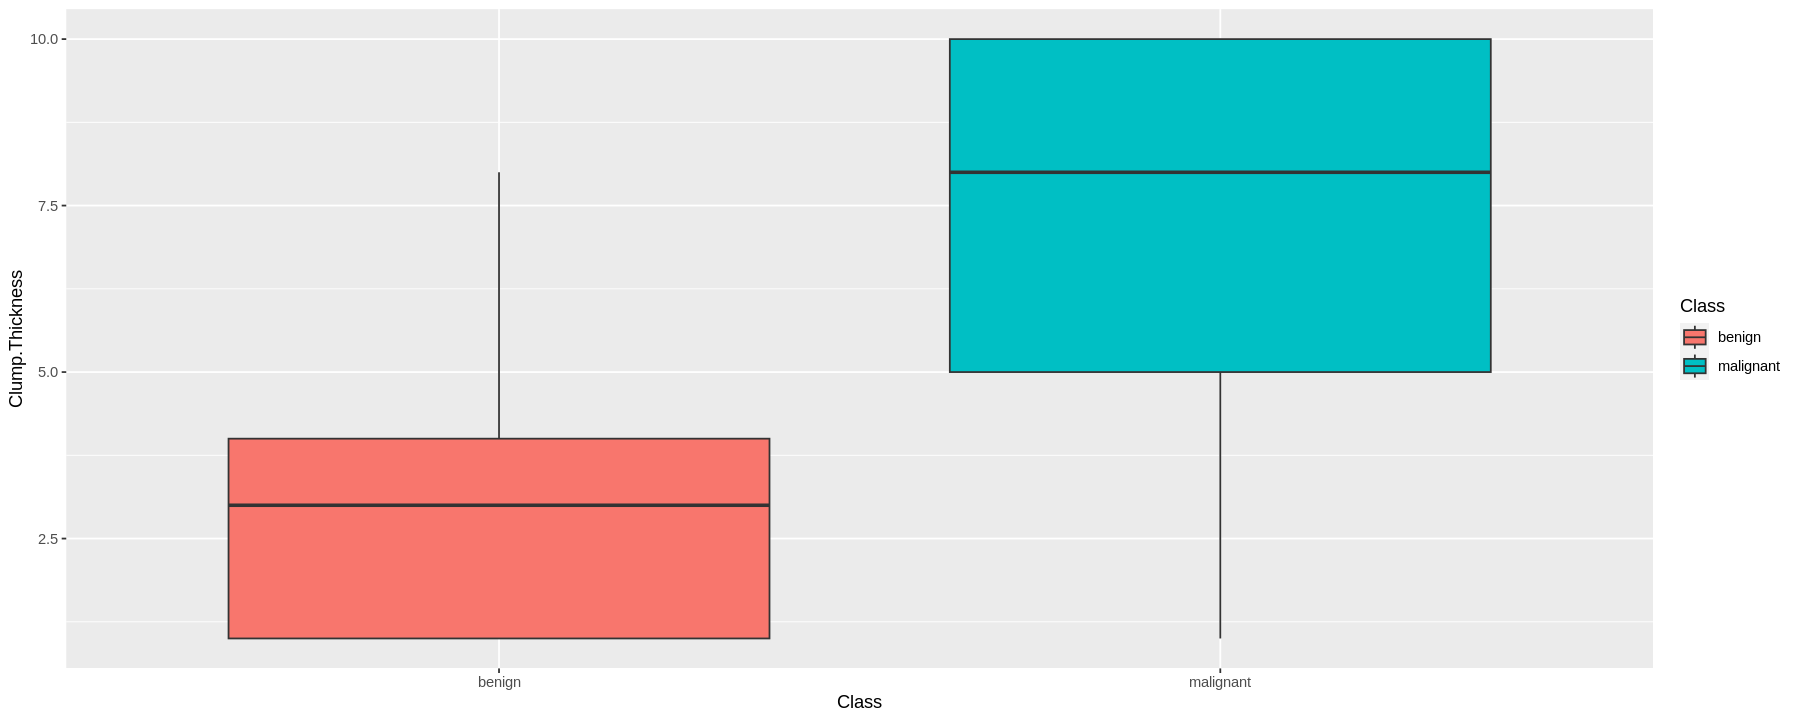

In [152]:
library(ggplot2)  # Make sure ggplot2 is loaded

# Create a boxplot chart for Clump.Thickness
ggplot(df, aes(x = Class, y = Clump.Thickness, fill = Class)) +
  geom_boxplot()

`geom_smooth()` using formula = 'y ~ x'


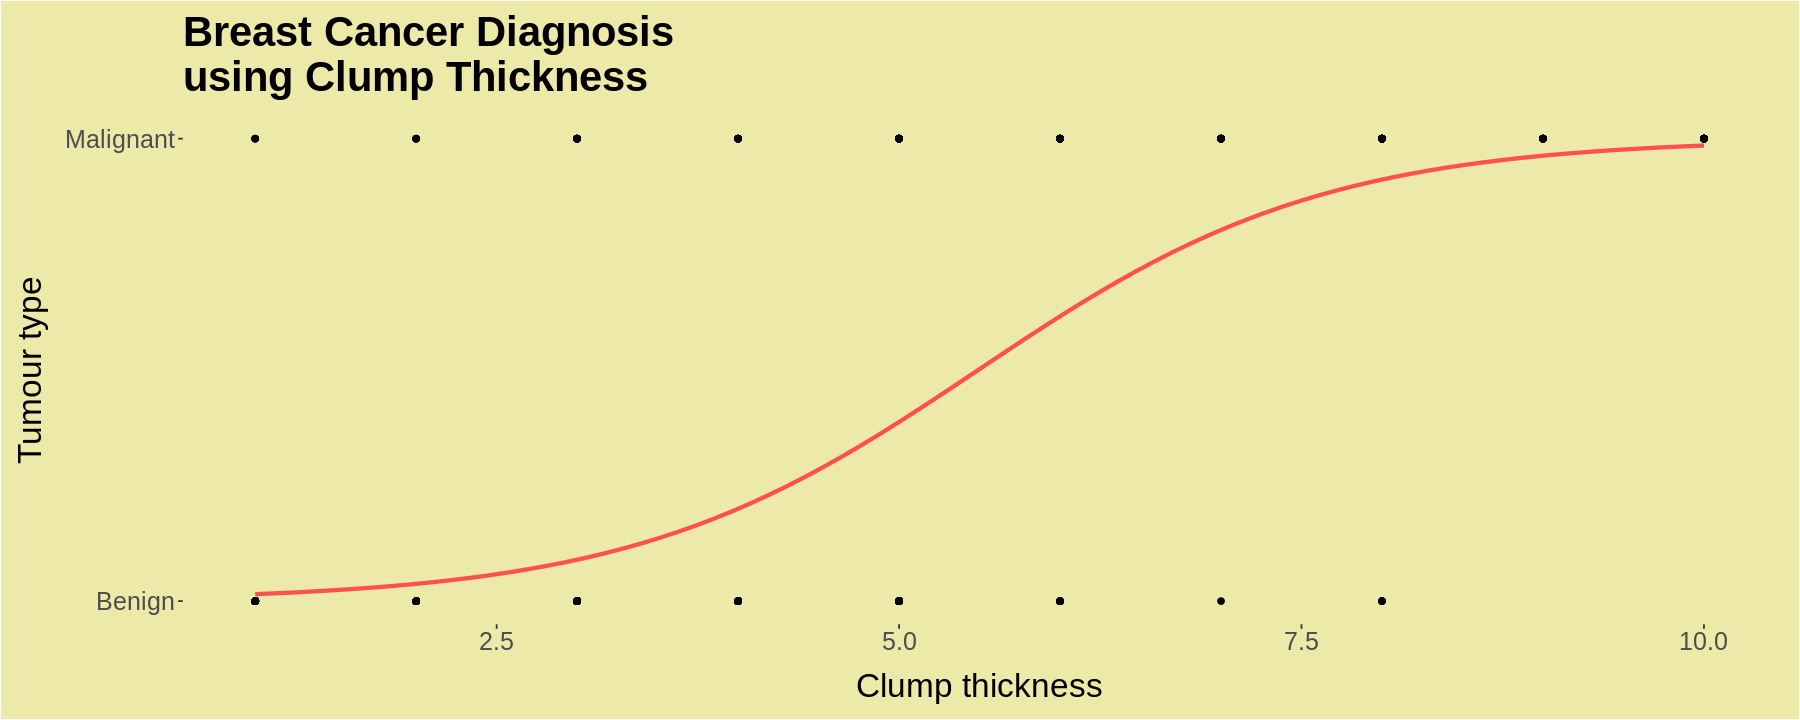

In [191]:
# clump thickness plot
ggplot() +
  geom_point(aes(df$Clump.Thickness, df$Class)) +
  geom_smooth(aes(df$Clump.Thickness, df$Class),
              method = "glm", se = FALSE, method.args = list(family = "binomial"),
              color = "#FF4F4F", size = 1.2) +
  ggtitle("Breast Cancer Diagnosis \nusing Clump Thickness") +
  ylab("Tumour type") +
  xlab("Clump thickness") +
scale_y_continuous(breaks = c(0, 1), labels = c("Benign", "Malignant")) +
  theme(plot.title = element_text(size = 25, face="bold",
                                 margin = margin(10,0,10,0)),
       plot.background = element_rect(fill = "#ECE9A9"),
       panel.background = element_rect(fill = "#ECE9A9"),
       axis.text.x = element_text(size = 15),
       axis.title.x = element_text(size = 20, margin = margin(11,0,10,0)),
       axis.text.y = element_text(size = 15),
       axis.title.y = element_text(size = 20, margin=margin(0,10,0,11)),
       panel.grid.major = element_blank(),
       panel.grid.minor = element_blank(),
       plot.margin = margin(0,0.5,0,0, "cm"))

## Predictive model using Logistic regression

**In order to train and test the model I need to split the data first.**


In [193]:
library(dplyr)

df <- read.csv("Breast Cancer Prediction.csv")
# replacing the values with 0 and 1 for the purpose of building logistic regression model
unique(df$Class)
df$Class <- ifelse(df$Class == 2, 0, 1)

# creating the index for the split
set.seed(123)
index <- createDataPartition(df$Class, p=0.8, times = 1, list=FALSE)

# splitting the data into train and test sets

train_set <- df%>% slice(index)
test_set <- df%>% slice(-index)

#checking that the split worked well
length(train_set$Class)
length(test_set$Class)


[1] 2 4

[1] 547

[1] 136

**Train The Model**

In [155]:
# Train a logistic regression model
model <- glm(Class ~ ., data = train_set, family = binomial)
# Summary of the model
summary(model)


Call:
glm(formula = Class ~ ., family = binomial, data = train_set)

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -1.007e+01  1.431e+00  -7.039 1.93e-12 ***
Sample.code.number           1.798e-07  4.482e-07   0.401  0.68832    
Clump.Thickness              3.960e-01  1.587e-01   2.495  0.01259 *  
Uniformity.of.Cell.Size      1.643e-01  2.418e-01   0.679  0.49690    
Uniformity.of.Cell.Shape     2.672e-01  2.506e-01   1.066  0.28639    
Marginal.Adhesion            3.180e-01  1.414e-01   2.249  0.02450 *  
Single.Epithelial.Cell.Size  3.977e-02  2.002e-01   0.199  0.84257    
Bare.Nuclei                  4.168e-01  1.070e-01   3.894 9.84e-05 ***
Bland.Chromatin              5.605e-01  2.116e-01   2.648  0.00809 ** 
Normal.Nucleoli              1.529e-01  1.280e-01   1.194  0.23246    
Mitoses                      5.031e-01  3.483e-01   1.445  0.14855    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’

In [156]:
# Predict using the trained logistic regression model on the test set
predictions <- predict(model, newdata = test_set, type = "response")

# Convert probabilities to binary predictions (0 or 1) based on a threshold
threshold <- 0.5
predicted_classes <- ifelse(predictions > threshold, 1, 0)

# Confusion matrix to evaluate the model's performance
confusion_matrix <- table(Actual = test_set$Class, Predicted = predicted_classes)

# Calculate accuracy, precision, recall, and F1 score
TP <- confusion_matrix[2, 2]  # True Positives
TN <- confusion_matrix[1, 1]  # True Negatives
FP <- confusion_matrix[1, 2]  # False Positives
FN <- confusion_matrix[2, 1]  # False Negatives

accuracy <- (TP + TN) / sum(confusion_matrix)
precision <- TP / (TP + FP)
recall <- TP / (TP + FN)
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("Accuracy:", round(accuracy * 100, 2),"%", "\n")
cat("Precision:", round(precision * 100, 2),"%", "\n")
cat("Recall:",  round(recall * 100, 2),"%","\n")
cat("F1 Score:",  round(f1_score * 100, 2),"%","\n")

# Create a data frame for the confusion matrix
confusion_df <- data.frame(
  Actual = rep(rownames(confusion_matrix), each = ncol(confusion_matrix)),
  Predicted = rep(colnames(confusion_matrix), times = nrow(confusion_matrix)),
  Freq = as.vector(confusion_matrix)
)


Accuracy: 95.59 % 
Precision: 95.56 % 
Recall: 91.49 % 
F1 Score: 93.48 % 


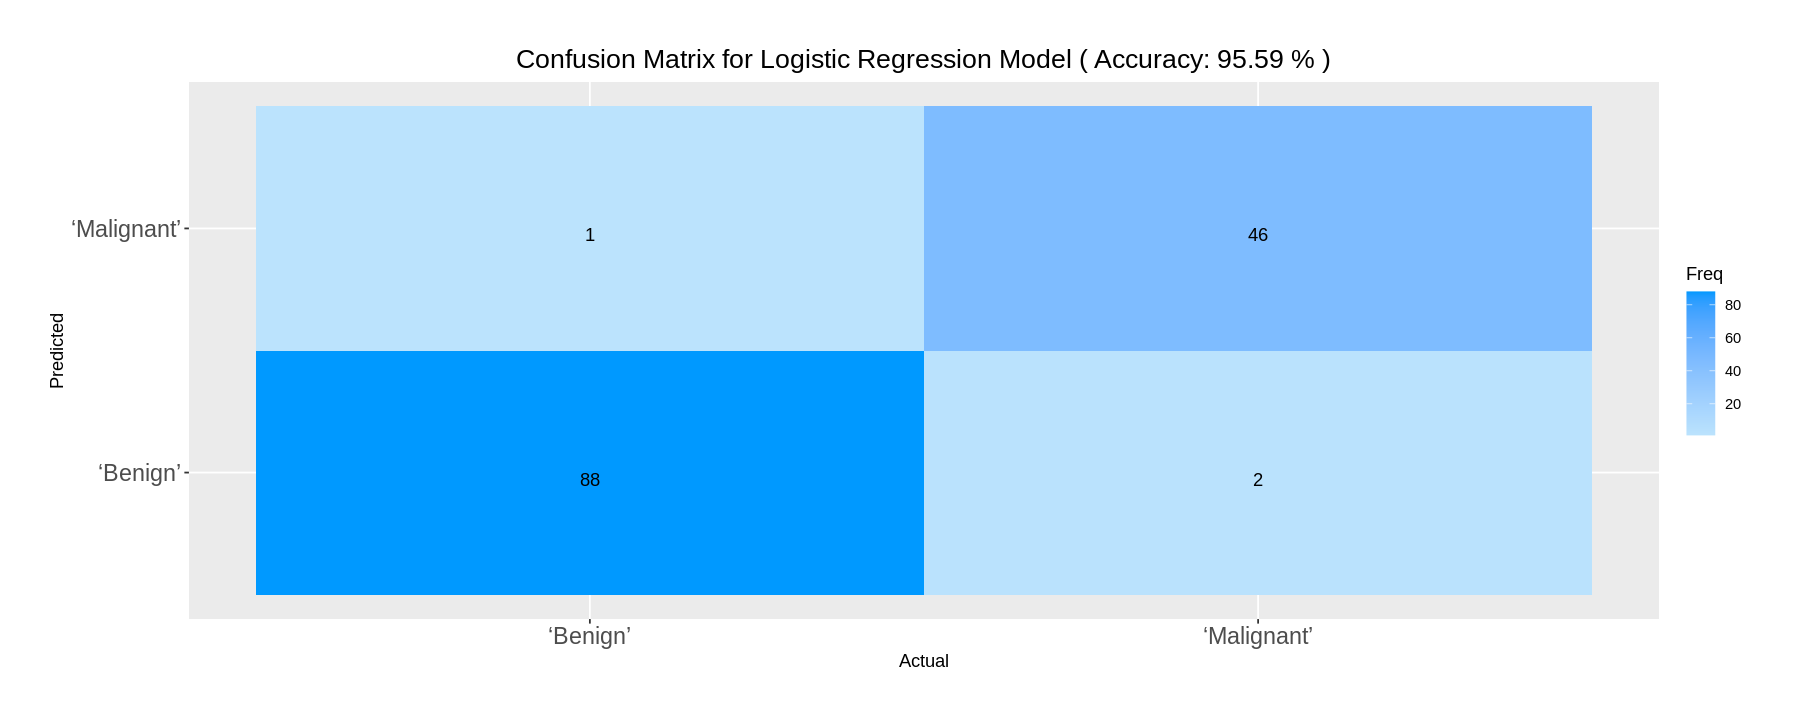

In [196]:
# Load the ggplot2 package
library(ggplot2)

# Create a confusion matrix plot using ggplot2 with labels changed and centered title
ggplot(data = confusion_df, aes(x = Actual, y = Predicted, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = 1) +
  scale_fill_gradient(low = "#BBE3FD", high = "#0099FF") +
  labs(x = "Actual", y = "Predicted") +
  scale_x_discrete(labels = c("0" = "‘Benign’", "1" = "‘Malignant’")) +
  scale_y_discrete(labels = c("0" = "‘Benign’", "1" = "‘Malignant’")) +
  theme(plot.title = element_text(hjust = 0.5, size = 16),
        plot.margin = margin(t = 30, r = 30, b = 30, l = 30),
        axis.text.x = element_text(size = 14),  # Adjust x-axis label size
        axis.text.y = element_text(size = 14))  +

  ggtitle("Confusion Matrix for Logistic Regression Model ( Accuracy: 95.59 % )")


## Predictive model using k-nearest neighbors algorithm (KNN)

In [178]:
# Load the necessary library
library(class)

# Load the dataset and preprocess it
df <- read.csv("Breast Cancer Prediction.csv")
df$Class <- ifelse(df$Class == 2, 0, 1)

# Split the data into training and test sets
set.seed(123)
index <- sample(1:nrow(df), 0.8 * nrow(df))
trainData <- df[index, ]
testData <- df[-index, ]

# Select the features and target variable
X_train <- trainData[, -c(1, 10)]  # Exclude the first and last columns (Sample.code.number and Class)
y_train <- trainData$Class
X_test <- testData[, -c(1, 10)]  # Exclude the first and last columns (Sample.code.number and Class)
y_test <- testData$Class

# Train the KNN model (let's use k=5 as an example)
knn_model <- knn(train = X_train, test = X_test, cl = y_train, k = 5)

# Make predictions on the test set
predicted_classes <- as.numeric(knn_model)
predicted_classes <- ifelse(predicted_classes == 1, 0, 1)
# Evaluate the KNN model
confusion_matrix <- table(Actual = y_test, Predicted = predicted_classes)
# Calculate accuracy, precision, recall, and F1 score
TP <- confusion_matrix[2, 2]  # True Positives
TN <- confusion_matrix[1, 1]  # True Negatives
FP <- confusion_matrix[1, 2]  # False Positives
FN <- confusion_matrix[2, 1]  # False Negatives

accuracy <- (TP + TN) / sum(confusion_matrix)
precision <- TP / (TP + FP)
recall <- TP / (TP + FN)
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("Accuracy:", round(accuracy * 100, 2), "%", "\n")
cat("Precision:", round(precision * 100, 2), "%", "\n")
cat("Recall:", round(recall * 100, 2), "%", "\n")
cat("F1 Score:", round(f1_score * 100, 2), "%", "\n")


Accuracy: 97.81 % 
Precision: 95.83 % 
Recall: 97.87 % 
F1 Score: 96.84 % 


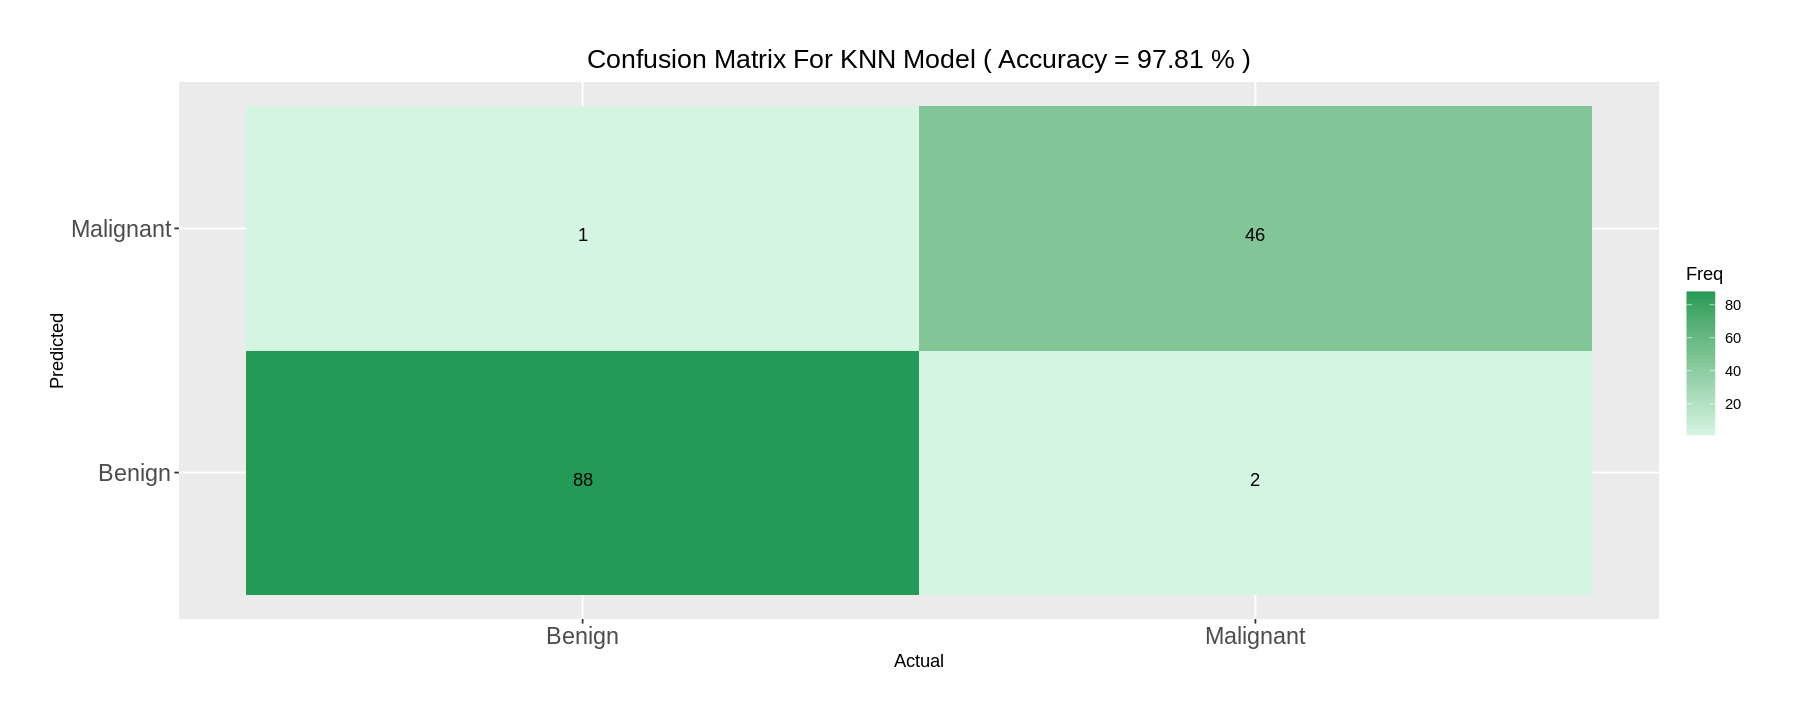

In [195]:
# Load the necessary libraries
library(ggplot2)

# Create a data frame for the confusion matrix
confusion_df <- data.frame(
  Actual = rep(rownames(confusion_matrix), each = ncol(confusion_matrix)),
  Predicted = rep(colnames(confusion_matrix), times = nrow(confusion_matrix)),
  Freq = as.vector(confusion_matrix)
)

# Create a confusion matrix plot using ggplot2 with labels changed and centered title
ggplot(data = confusion_df, aes(x = Actual, y = Predicted, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = 1) +
  scale_fill_gradient(low = "#D5F5E3", high = "#239B56") +
  labs(x = "Actual", y = "Predicted") +
  scale_x_discrete(labels = c("0" = "Benign", "1" = "Malignant")) +
  scale_y_discrete(labels = c("0" = "Benign", "1" = "Malignant")) +
  theme(plot.title = element_text(hjust = 0.5, size = 16),
        plot.margin = margin(t = 30, r = 30, b = 30, l = 30),
        axis.text.x = element_text(size = 14),  # Adjust x-axis label size
        axis.text.y = element_text(size = 14))  +
  ggtitle("Confusion Matrix For KNN Model ( Accuracy = 97.81 % )")



## **Conclusion**
What Done In This Colaboratory : Using R programming Language


---

1.   Identify The Data.
2.   Data Preprocessing.
3.   Exploratory Data Analysis.(using)
> * Descriptive Statistics
> * Visualization Charts (Boxplot,Scatter plot,Bar plot,Correlation map, ...etc)
4. Predictive Models
> * Logistic regression Model (  Accuracy: 95.59 %  )
> * KNN Model (  Accuracy: 97.81 %  )

---

We have studied different measures typically used to test a patient for breast cancer. We have built a logistic regression model & KNN Model, using these measures, and seen that it works well classifying values.


# Mickey 👋